# Lendo dados no Pandas 

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

filmes = pd.read_csv('movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Organizando os generos dos filmes

In [2]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Primeiro método K-means

Escalando os itens (dando as proporções aos itens em relação a quantas vezes aparece)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Organizando por grupos utilizando o k-means (o numero de clusters representa o numero de grupos a serem alocados)

In [4]:
from sklearn.cluster import KMeans

def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return numero_de_clusters, modelo.inertia_,modelo

Visualizando grupos

In [5]:
def TabelaGrupos(modelo):

    grupos = pd.DataFrame(modelo.cluster_centers_,
                columns=generos.columns)
    grupos.transpose().plot.bar(subplots=True,
                   figsize=(25, 25),
                   sharex=False)

In [6]:
from sklearn.manifold import TSNE
import seaborn as sns

def DistribuicaoGrupos(numero_grupos):

    tsne = TSNE()
    visualizacao = tsne.fit_transform(generos_escalados)#mapeia para 2D

    sns.set(rc={'figure.figsize': (13, 13)})
    sns.scatterplot(x=visualizacao[:, 0],
                   y=visualizacao[:, 1],
                   hue=modelo.labels_,
                   palette=sns.color_palette('Set1', numero_grupos))

In [7]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def DendrogramaGrupos(modelo):

    grupos = pd.DataFrame(modelo.cluster_centers_,
                columns=generos.columns)

    plt.figure(figsize=(10, 7))  
    plt.title("Customer Dendograms")  
    dend = shc.dendrogram(shc.linkage(grupos, method='ward'))  
    
    return dend

In [8]:
def VisualizarGrupo(grupo):
    return dados_dos_filmes[modelo.labels_ == grupo].sample(10)

Aplicando modelo

In [9]:
import time

tic = time.time()
numero_de_clusters,inertia,modelo = kmeans(10, generos_escalados)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)
#inercia representa o quanto o objeto esta longe do centro do cluster
print("Numero de clusters: " + str(numero_de_clusters) + " Inércia: %.2f" % inertia )

Tempo 0.77 segundos
Numero de clusters: 10 Inércia: 103090.94


In [10]:
grupo = VisualizarGrupo(0)
grupo

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6662,57274,[REC] (2007),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8283,105801,Escape From Tomorrow (2013),Drama|Fantasy|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
857,1128,"Fog, The (1980)",Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2652,3550,The Hunger (1983),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4863,7266,"Lost Skeleton of Cadavra, The (2002)",Comedy|Horror|Sci-Fi,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
5455,26122,Onibaba (1964),Drama|Horror|War,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7943,95796,Anaconda: The Offspring (2008),Action|Horror|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
6577,55232,Resident Evil: Extinction (2007),Action|Horror|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
5183,8405,Hour of the Wolf (Vargtimmen) (1968),Drama|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2614,3499,Misery (1990),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


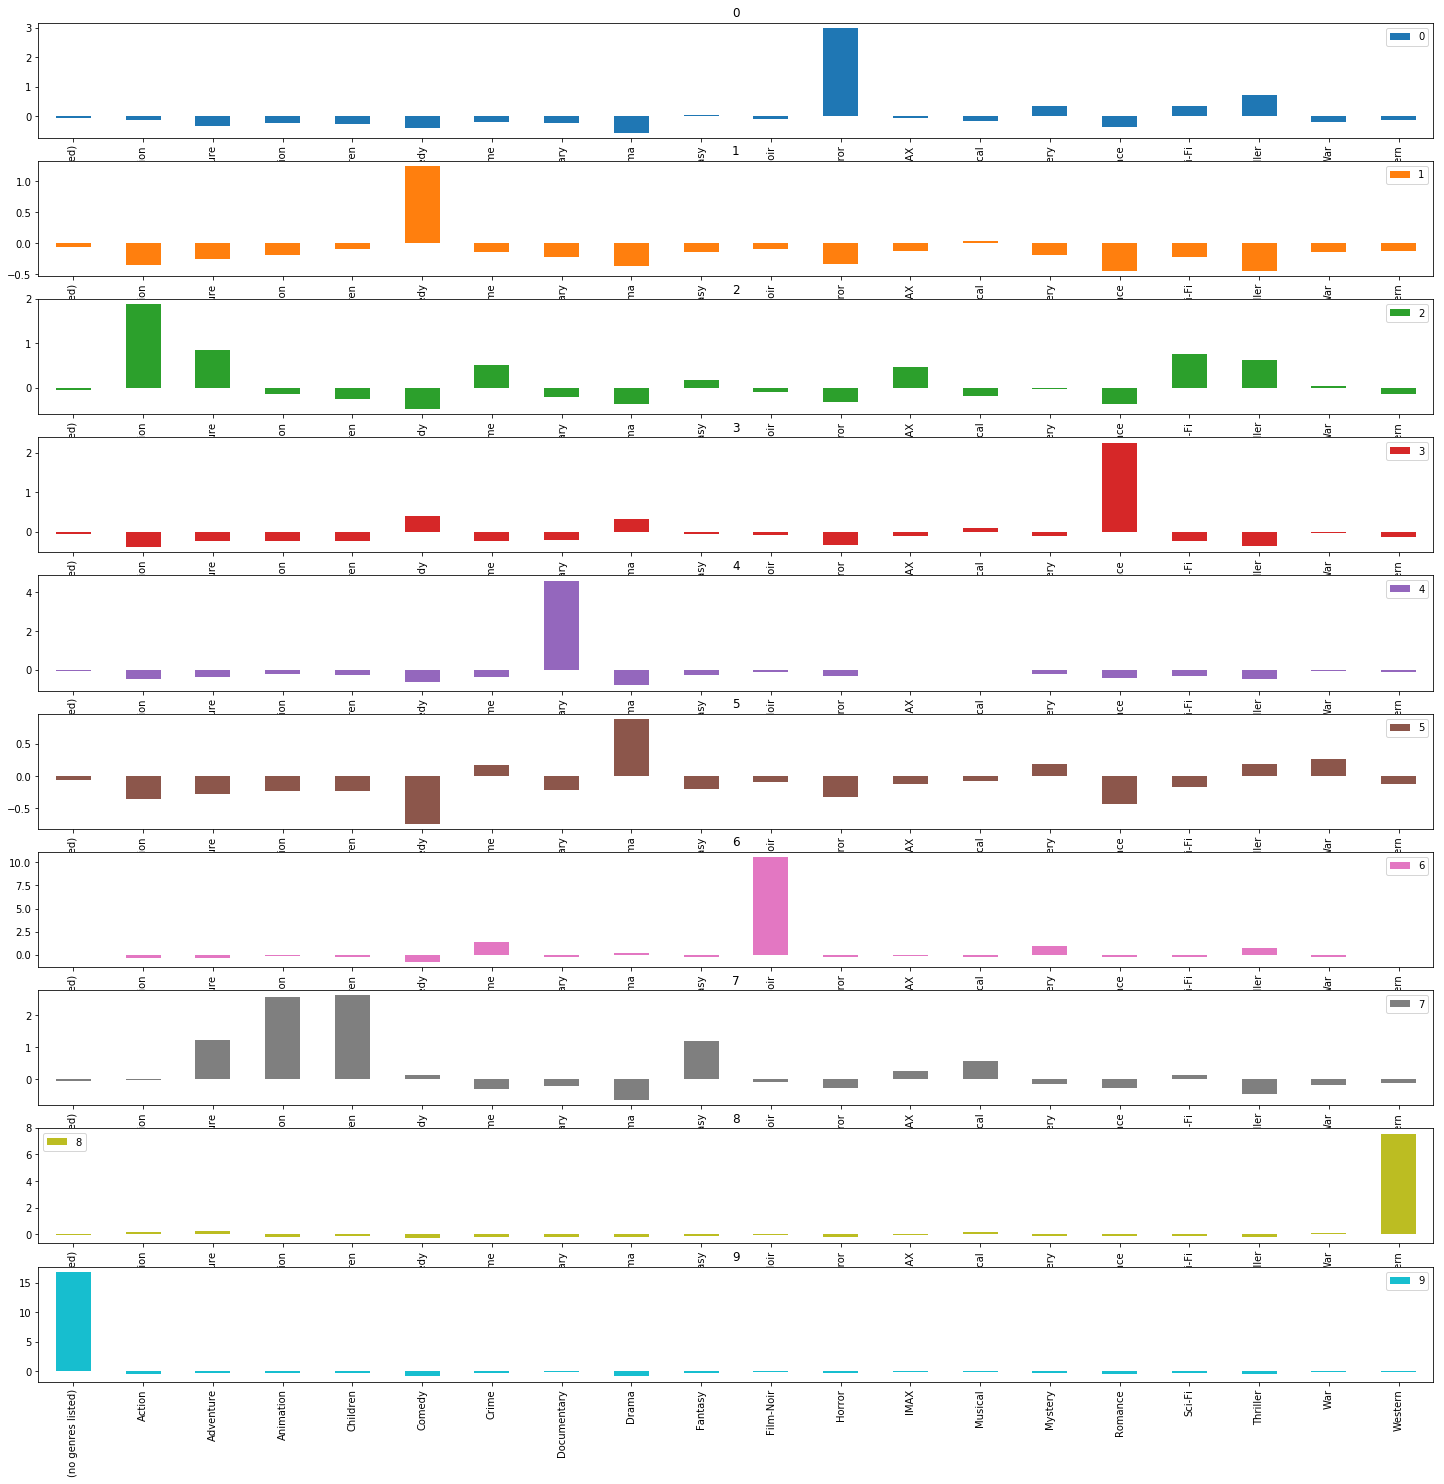

In [11]:
grafico = TabelaGrupos(modelo)
grafico

Visualizar grupo especifico

Outra visualização

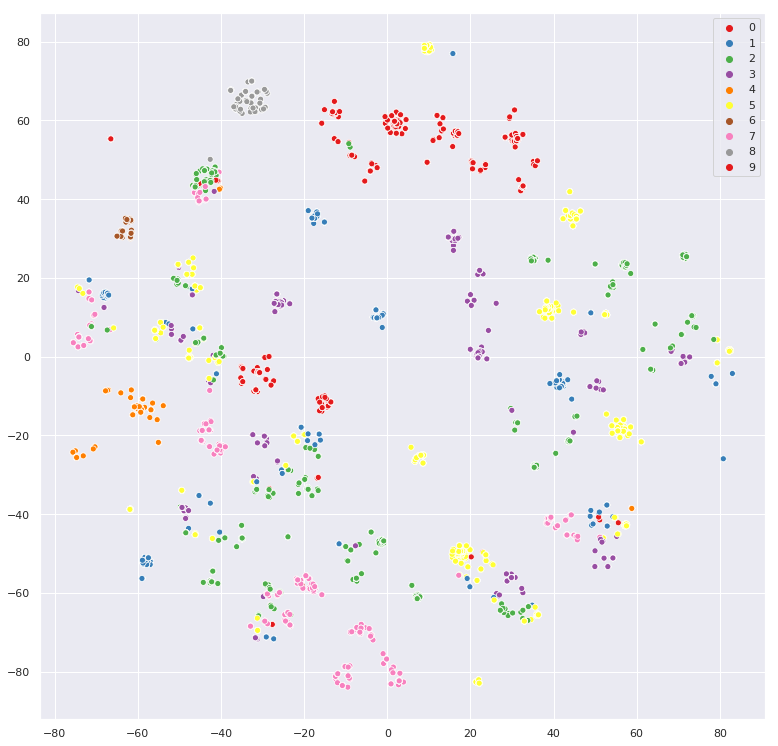

In [12]:
grafico2 = DistribuicaoGrupos(10)
grafico2

Observar dendrograma relativo aos clusters do k-means (distâncias relativas a cada grupo)

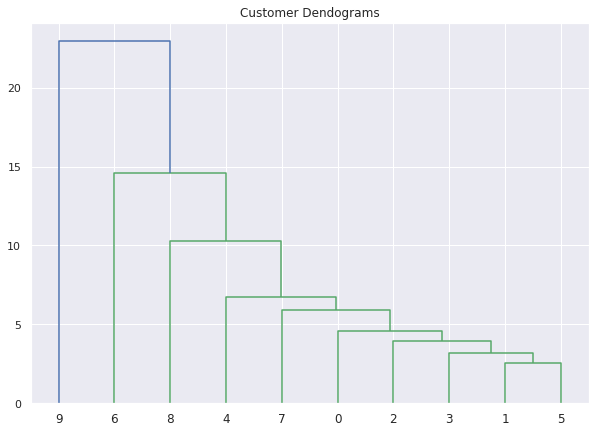

In [13]:
dendrograma = DendrogramaGrupos(modelo)

# Procurando melhores parâmetros (n_clusters) para o k-means

In [14]:
#rodando varios clusters
resultado_completo = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

resultado = pd.DataFrame(resultado_completo, 
            columns=['grupos', 'inertia', 'metodo'])
resultado = resultado.drop(columns=["metodo"], axis=1)
resultado.head()

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166516.645372
3,4,157725.829977
4,5,148303.688054


Método do cotovelo (escolher onde o gráfico inclina)

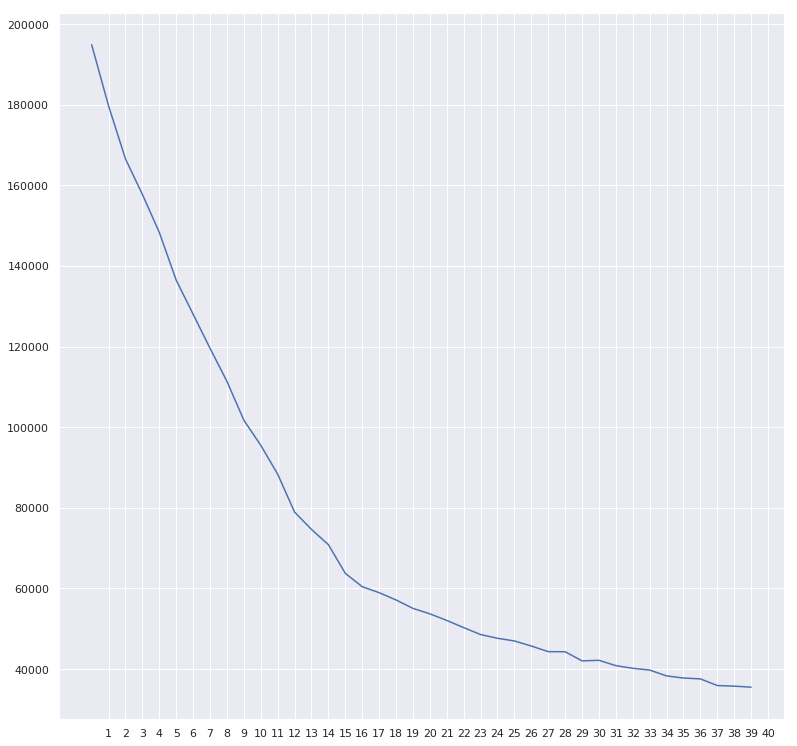

In [15]:
resultado.inertia.plot(xticks=resultado.grupos)

# Segundo método (AgglomerativeClustering, modelo hierárquico)

Analizando dendrograma dos dados crus

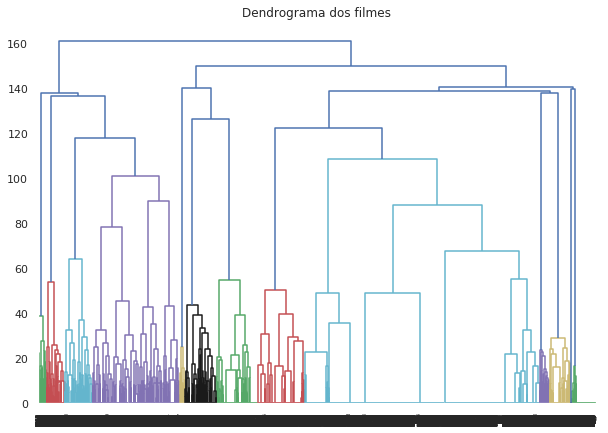

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma dos filmes")  
dend = shc.dendrogram(shc.linkage(generos_escalados, method='ward'))  

O numero de clusters no agg representará o numero de grupos partindo de cima do dendrograma

In [17]:
from sklearn.cluster import AgglomerativeClustering

def ModeloAgg(numero_de_clusters):

    modelo = AgglomerativeClustering(numero_de_clusters)
    modelo.fit_predict(generos_escalados)
    return modelo

In [18]:
modelo = ModeloAgg(17)
modelo.labels_

array([ 5, 14, 13, ...,  2,  5,  3])

In [19]:
def VisualizarAgg(modelo, numero_clusters):
    tsne = TSNE()
    visualizacao = tsne.fit_transform(generos_escalados) #mapeia para 2D

    sns.scatterplot(x=visualizacao[:, 0],
                   y=visualizacao[:, 1],
                   hue=modelo.labels_,
                   palette=sns.color_palette('Set1', numero_clusters))


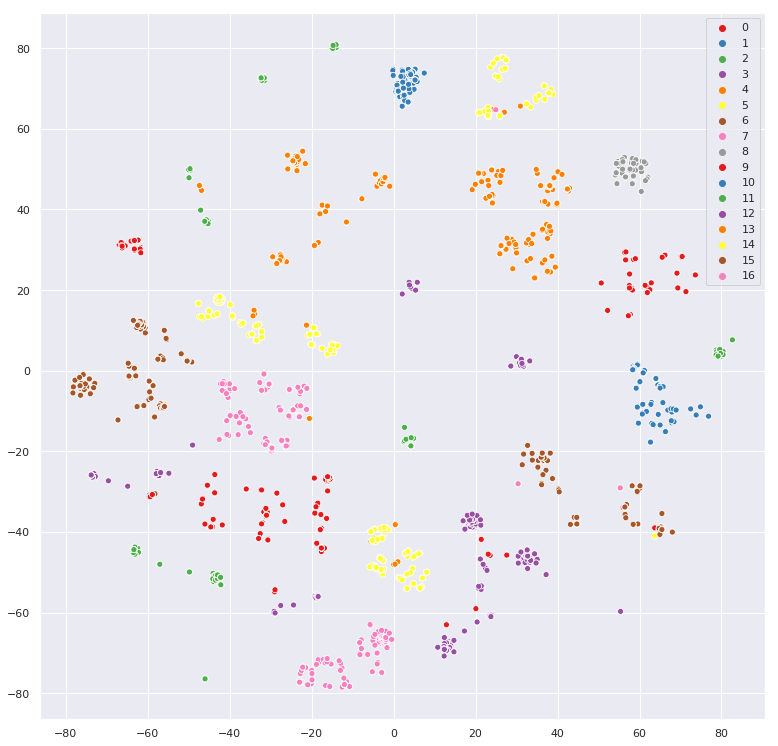

In [20]:
VisualizarAgg(modelo,17)